# Importation des données

In [1]:
import yfinance as yf
import datetime


In [2]:
# Définir la date de fin comme la date actuelle
end_date = datetime.datetime.now().strftime('%Y-%m-%d')

# Calculer la date de début comme 6 ans avant la date actuelle
start_date = (datetime.datetime.now() - datetime.timedelta(days=365*6)).strftime('%Y-%m-%d')

# Symbole du CAC 40 sur Yahoo Finance
cac_40_symbol = '^FCHI'
s_p_500_symbol = '^GSPC'
oddo_symbol ='0P00000QLG.F'
echiquier_symbol ='0P0000YRTT.F'

# Récupérer les données historiques à l'aide de yfinance
cac_40_data = yf.download(cac_40_symbol, start=start_date, end=end_date)
s_p_500_data = yf.download(s_p_500_symbol, start=start_date, end=end_date)
oddo_data = yf.download(oddo_symbol, start=start_date, end=end_date)
echiquier_data = yf.download(echiquier_symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
# Calcul du rendement simple
import pandas as pd
cac_40_data['Rendement'] = cac_40_data['Close'].pct_change()
s_p_500_data['Rendement'] = s_p_500_data['Close'].pct_change()
oddo_data['Rendement'] = oddo_data['Close'].pct_change()
echiquier_data['Rendement'] = echiquier_data['Close'].pct_change()

In [4]:
#Calcul rendement cumulé
cac_40_data['Rendement Cumulé'] = (1 + cac_40_data['Rendement']).cumprod()
s_p_500_data['Rendement Cumulé'] = (1 + s_p_500_data['Rendement']).cumprod()
oddo_data['Rendement Cumulé'] = (1 + oddo_data['Rendement']).cumprod()
echiquier_data['Rendement Cumulé'] = (1 + echiquier_data['Rendement']).cumprod()

# Graphique des différentes performances

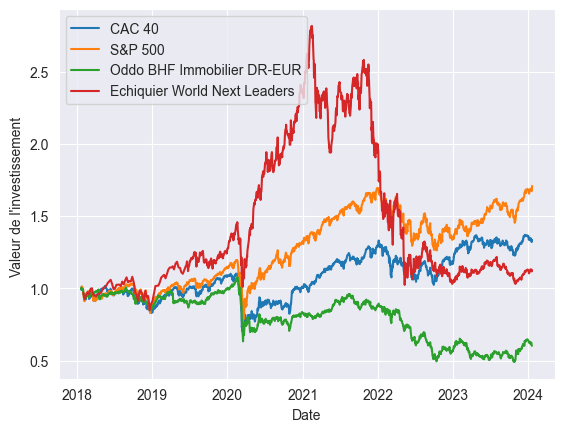

In [5]:
import matplotlib.pyplot as plt

plt.plot(cac_40_data['Rendement Cumulé'], label='CAC 40')
plt.plot(s_p_500_data['Rendement Cumulé'],label='S&P 500')
plt.plot(oddo_data['Rendement Cumulé'],label ='Oddo BHF Immobilier DR-EUR')
plt.plot(echiquier_data['Rendement Cumulé'],label ='Echiquier World Next Leaders')
plt.xlabel("Date")
plt.ylabel("Valeur de l'investissement ")
plt.legend()
plt.grid(True)
plt.show()


# Tableau des volatilités

In [6]:
import pandas as pd

def calculer_volatilite_annuelle_multiple(dataframes, annee_debut, annee_fin):

    # Initialiser un DataFrame pour stocker les résultats de la volatilité
    resultats_volatilite = pd.DataFrame()

    # Calculer la volatilité annuelle pour chaque année et chaque actif financier
    for annee in range(annee_debut, annee_fin + 1):
        for df, nom_actif in dataframes:

            df['Annee'] = df.index.year
            # Filtrer les données pour l'année en cours
            donnees_annee = df[df['Annee'] == annee]

            # Calculer la volatilité annuelle
            volatilite_annuelle = donnees_annee['Rendement'].std() * (252**0.5) *100 # 252 jours de trading par an

            # Ajouter les résultats au DataFrame
            resultats_volatilite.loc[annee, nom_actif] = volatilite_annuelle

    return resultats_volatilite

# Exemple d'utilisation
dataframes = [(cac_40_data, 'CAC 40'), (s_p_500_data, 'S&P 500'), (oddo_data, 'Oddo BHF DR-EUR'), (echiquier_data, 'Echiquier WNL')]
resultats_volatilite = calculer_volatilite_annuelle_multiple(dataframes, 2018, 2023)
print( "         Tableau de volaitilité par année (%)        \n")
print(resultats_volatilite)


         Tableau de volaitilité par année (%)        

         CAC 40    S&P 500  Oddo BHF DR-EUR  Echiquier WNL
2018  13.950744  17.396150        13.334522      54.713789
2019  13.258789  12.472062        12.433247      23.474110
2020  32.326159  34.430996        30.741885      33.216287
2021  13.935745  13.100093        14.615208      30.605643
2022  22.291126  24.173530        28.471978      44.047438
2023  13.862633  13.092856        25.515268      12.868938


# Tableau des performances

In [7]:
def calculer_rendement_total_annuel(dataframes, annee_debut, annee_fin):

    # Initialiser un DataFrame pour stocker les résultats du rendement total
    resultats_rendement = pd.DataFrame()

    # Calculer le rendement total annuel pour chaque année et chaque actif financier
    for annee in range(annee_debut, annee_fin + 1):
        for df, nom_actif in dataframes:

            df['Annee'] = df.index.year
            # Filtrer les données pour l'année en cours
            donnees_annee = df[df['Annee'] == annee]

            # Calculer le rendement total annuel
            rendement_total_annuel = (donnees_annee['Rendement'] + 1).prod() - 1
            rendement_total_annuel *= 100  # Pourcentage

            # Ajouter les résultats au DataFrame
            resultats_rendement.loc[annee, nom_actif] = rendement_total_annuel

    return resultats_rendement

# Exemple d'utilisation
dataframes = [(cac_40_data, 'CAC 40'), (s_p_500_data, 'S&P 500'), (oddo_data, 'Oddo BHF DR-EUR'), (echiquier_data, 'Echiquier WNL')]
resultats_rendement = calculer_rendement_total_annuel(dataframes, 2018, 2023)
print("        Tableau de performance par année (%)      \n")
print(resultats_rendement)


        Tableau de performance par année (%)      

         CAC 40    S&P 500  Oddo BHF DR-EUR  Echiquier WNL
2018 -14.639151 -11.511589       -13.998192     -10.749506
2019  26.367615  28.878070        15.385926      39.005520
2020  -7.136929  16.258923       -16.107988      91.424298
2021  28.850681  26.892739         5.954503     -15.801945
2022  -9.496256 -19.442827       -36.117492     -47.805274
2023  16.519309  24.230501        13.901567       8.192980


# Matrice de corrélation

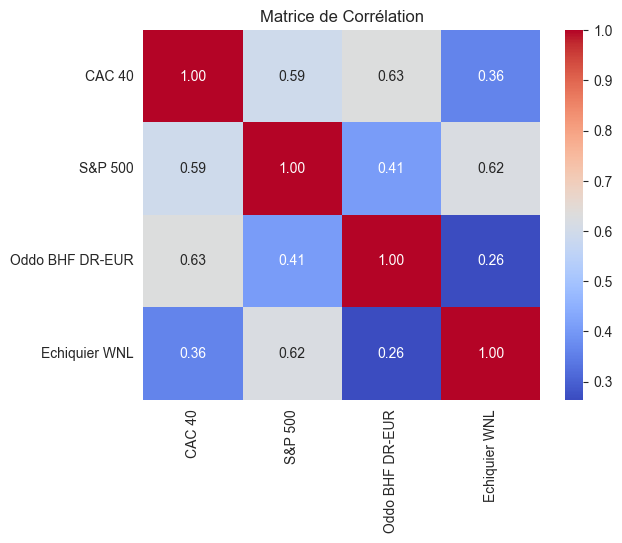

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Exemple : Création d'un DataFrame avec des données fictives
data = {
    'CAC 40': cac_40_data['Rendement'],
    'S&P 500': s_p_500_data['Rendement'],
    'Oddo BHF DR-EUR': oddo_data['Rendement'],
    'Echiquier WNL': echiquier_data['Rendement']
}

df = pd.DataFrame(data)

# Calcul de la matrice de corrélation
matrice_corr = df.corr()

# Affichage de la matrice de corrélation avec seaborn
sns.heatmap(matrice_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de Corrélation')
plt.show()



